In [1]:
# 타이타닉의 생존율 분석
# 상관분석, 상관계수, 피어슨 상관계수, 히드맵
# 모델링 : 모든 변수간의 상관계수 
#          지정한 두 변수간의 상관계수
# 생존과 가장 상관관계가 높은 변수

In [2]:
# 상관분석
# 두 변수사이의 선형관계
# 두 변수 서로 독립적이거나 상관된 관계, 그 강도를 상관관계
# 상관관계는 인과관계를 나타내는 척도가 아님.. 주의할것 정확한 예측치는 계산 불가

In [3]:
#단순 상관관계 - 두 변수간의 관계

In [4]:
# 다중 상관관계 - 세개 이상의 변수간의 강도
# 편상관분석 : 다른 변수와의 관계를고정하고 두 변수간의 강도

In [5]:
# 상관계수 p
# ~ 0.2 : 거의 없음
# 0.2 ~ 0.4 : 약함
# 0.4 ~ 0.6 : 상관관계가 있음
# 0.6 ~ 0.8 : 강한 상관관계가 있음
# 0.8 ~ 1 : 매우 강한 상관관계가 있음

In [6]:
# 필요한 페키지 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# 1. 데이터 수집
titanic = sns.load_dataset('titanic')

In [8]:
# 2. 데이터 전처리
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# age 처리여부
# 1. 채운다.
# 남여에따라서 평균을 채운다. (o)
female_mean, male_mean =  round(titanic.groupby(['sex'])['age'].mean()).values
# 나이를 구간으로 구분한 컬럼을 만들어서. (기회되면)  연속형데이터->범주형데이터

In [10]:
female_mean, male_mean

(28.0, 31.0)

In [11]:
titanic['age'] = titanic['age'].fillna(titanic.groupby(['sex'])['age'].transform('mean') )

In [20]:
# 범주형 데이터의 결측치 처리는 가장 많은 빈도를 차지하는 번주형 데이터 값으로 채워주세요.
titanic.drop(columns=['deck'],inplace=True)

In [22]:
titanic['embarked'] = titanic['embarked'].fillna('S')
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [23]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [24]:
# 3. 탐색적 데이터 분석
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

Text(0.5, 1.0, 'male')

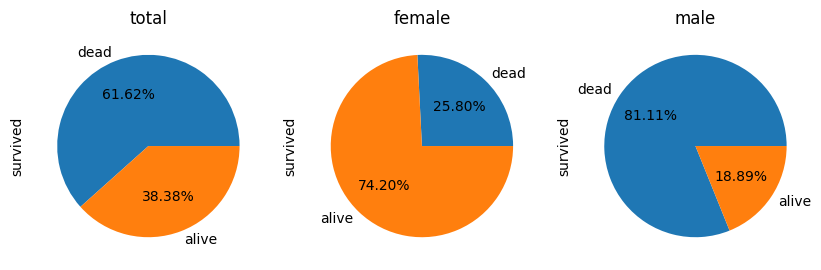

In [63]:
fig,ax = plt.subplots(1,3,figsize=(10,5))
titanic.survived.value_counts().sort_index().plot.pie(labels=['dead','alive'],autopct = '%.2f%%',ax=ax[0])

female = titanic[titanic['sex'] == 'female']
female.survived.value_counts().sort_index().plot.pie(labels=['dead','alive'],autopct = '%.2f%%',ax=ax[1])

male = titanic[titanic['sex'] == 'male']
male.survived.value_counts().sort_index().plot.pie(labels=['dead','alive'],autopct = '%.2f%%',ax=ax[2])

ax[0].set_title('total')
ax[1].set_title('female')
ax[2].set_title('male')

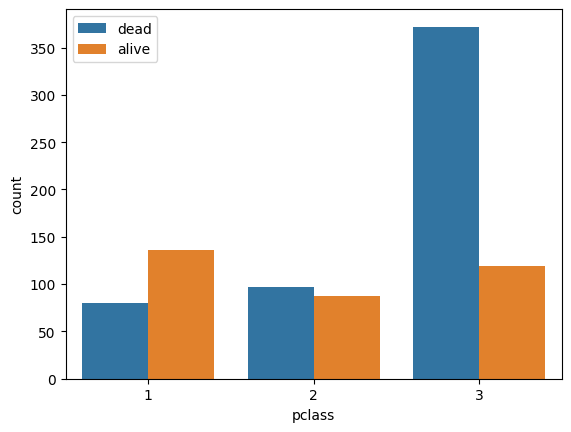

In [66]:
# sns countplot으로 pclass 별 생존현황 bar
sns.countplot(data=titanic,x='pclass',hue='survived')
plt.legend(['dead','alive'])
plt.show()

In [67]:
# 상관계수 구하고 필요하면 저장하기
titanic_corr =  titanic.corr(method='pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.080453,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.330391,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.080453,-0.330391,1.000000,-0.236920,-0.182556,0.089079,0.271956,0.187312
sibsp,-0.035322,0.083081,-0.236920,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.182556,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.089079,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.271956,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.187312,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [68]:
titanic_corr.to_csv('titanic_corr.csv')

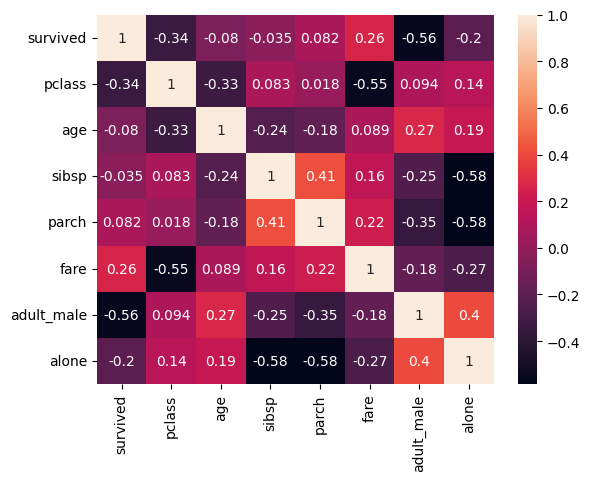

In [70]:
sns.heatmap(data=titanic_corr,annot=True)
plt.show()

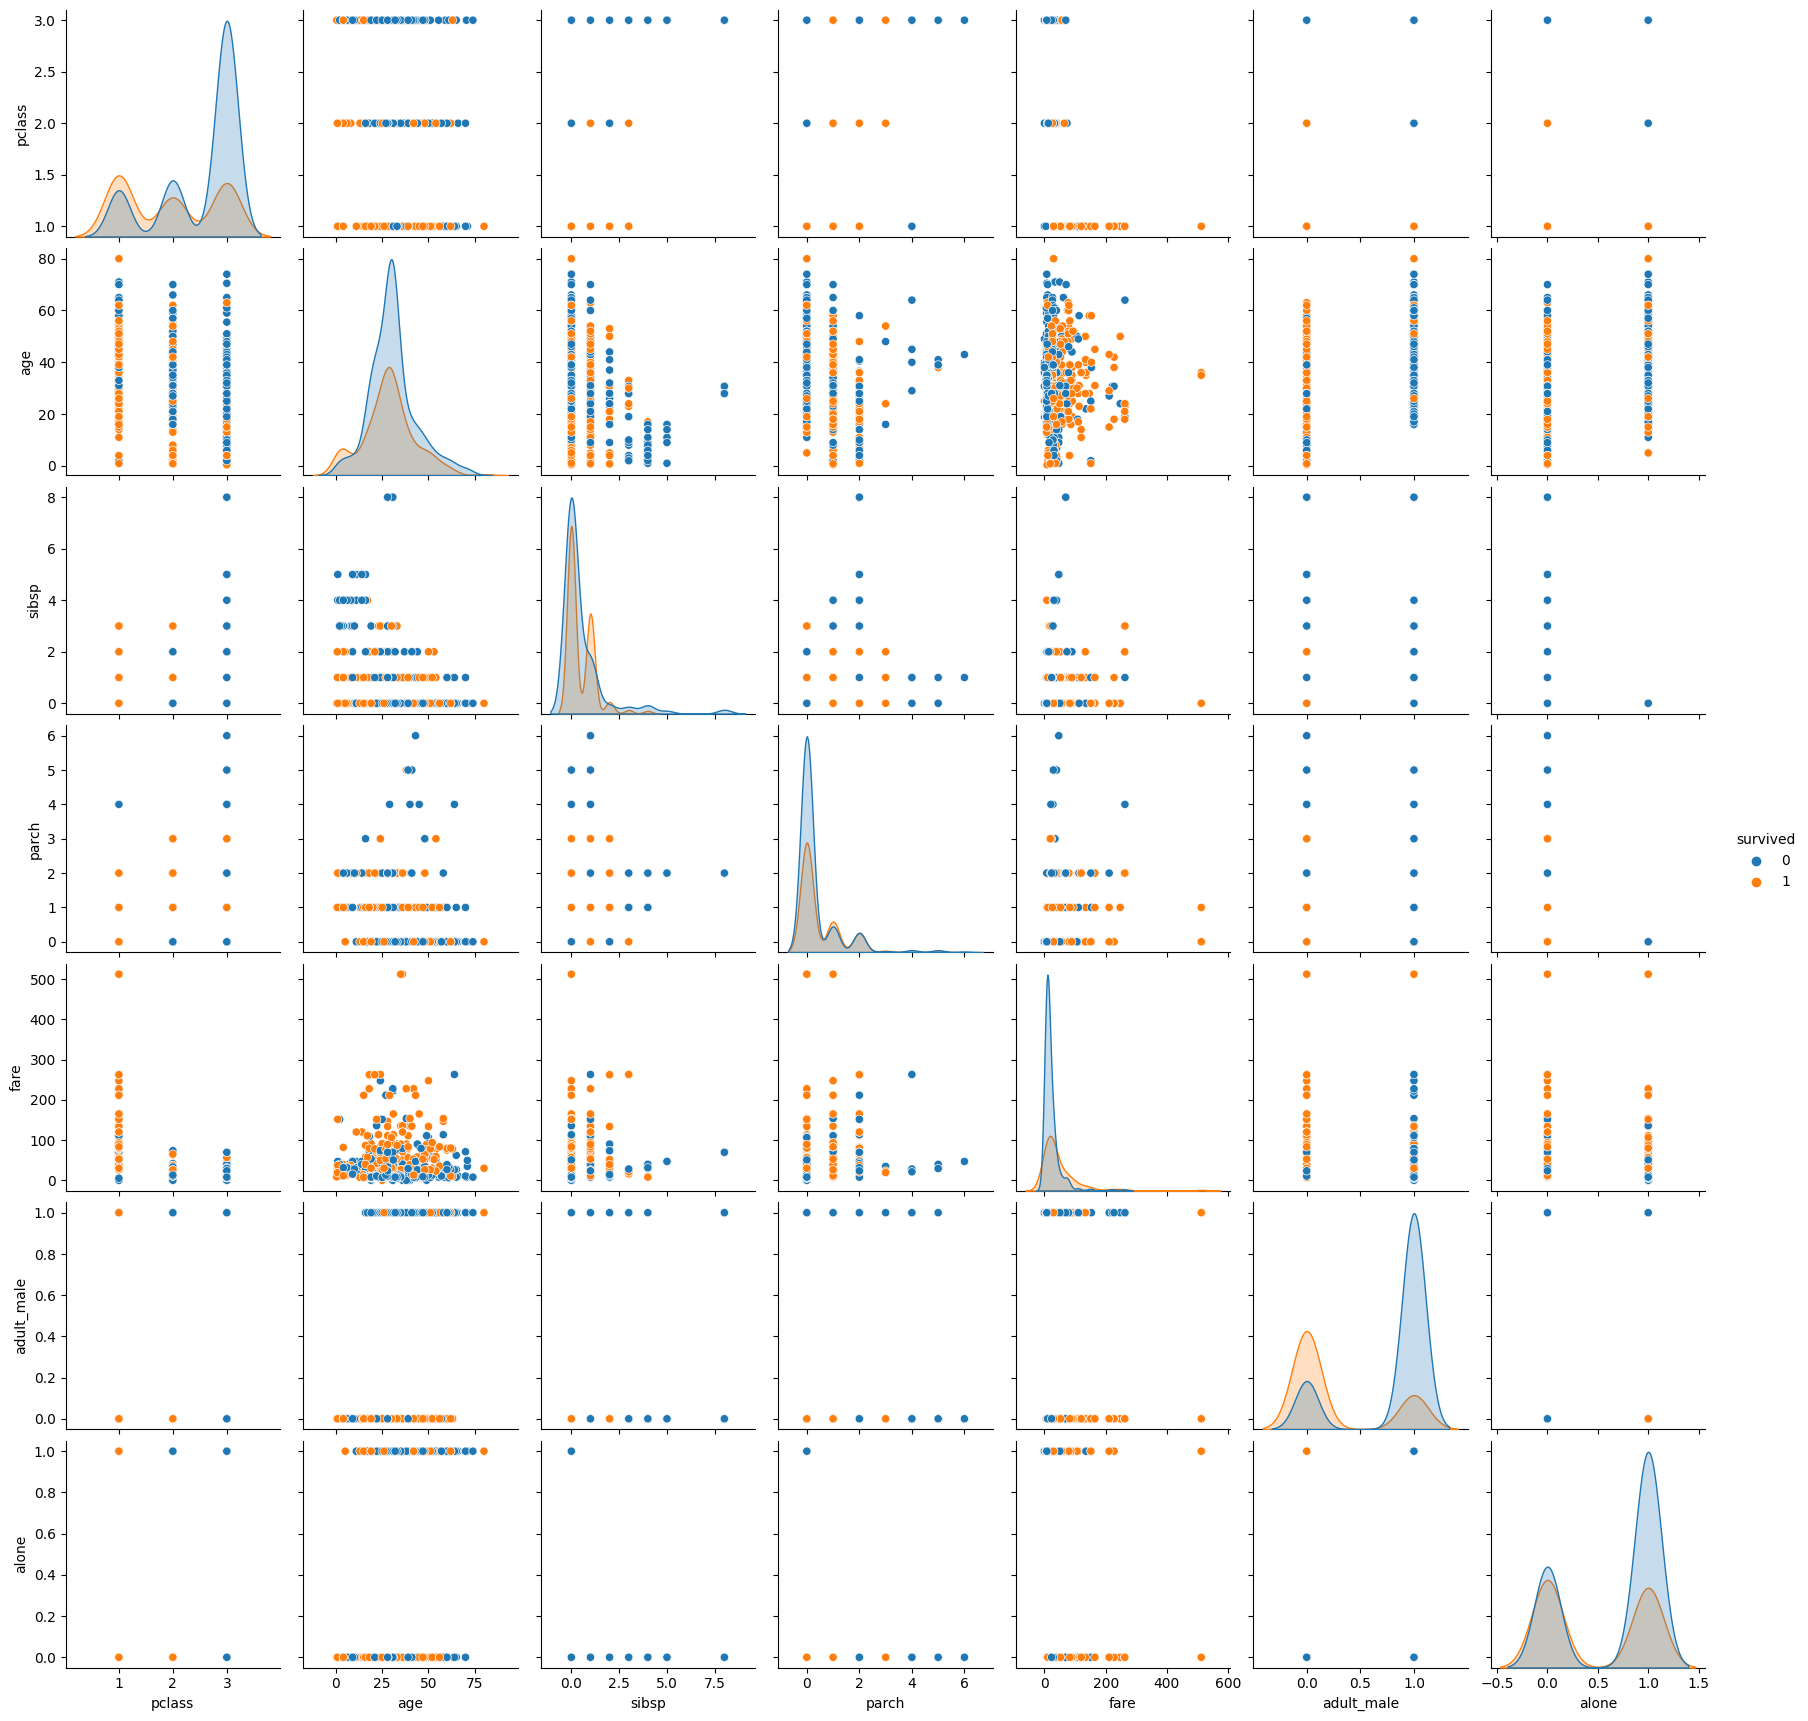

In [72]:
sns.pairplot(data=titanic,hue='survived')
plt.show()

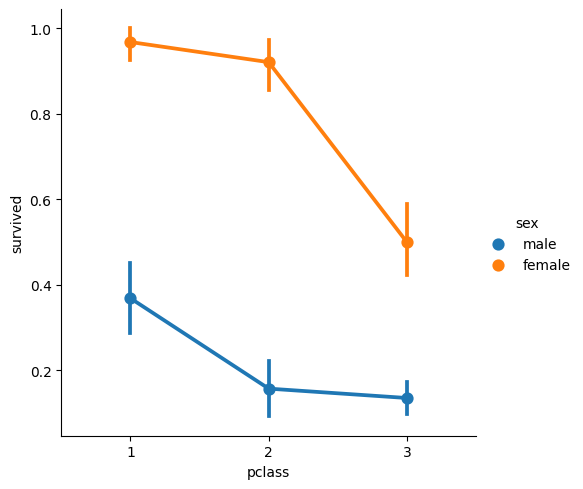

In [78]:
# 두 변수의 상관관계  시각화
sns.catplot(data=titanic, x='pclass', y='survived',hue='sex', kind='point')

In [100]:
# age 10개의 등급으로 나눈다
# 성별은 0, 1변경
exclude_cols = ['embarked','who','adult_male','embark_town','alive','alone']
include_cols = titanic.columns.difference(exclude_cols)
titanic2 = titanic.loc[:,include_cols]
titanic2

,age,class,fare,parch,pclass,sex,sibsp,survived
0,22.000000,Third,7.2500,0,3,male,1,0
1,38.000000,First,71.2833,0,1,female,1,1
2,26.000000,Third,7.9250,0,3,female,0,1
3,35.000000,First,53.1000,0,1,female,1,1
4,35.000000,Third,8.0500,0,3,male,0,0
...,...,...,...,...,...,...,...,...
886,27.000000,Second,13.0000,0,2,male,0,0
887,19.000000,First,30.0000,0,1,female,0,1
888,27.915709,Third,23.4500,2,3,female,1,0
889,26.000000,First,30.0000,0,1,male,0,1


In [102]:
titanic2['sex']  = titanic2.sex.map({'male':1,'female':0})
# index = titanic2[titanic2.sex == 'male'].index
# titanic2.loc[index,'sex'] = 1
# index = titanic2[titanic2.sex == 'female'].index
# titanic2.loc[index,'sex'] = 0
# titanic2.sex.value_counts()
# titanic2.sex = titanic2.sex.astype(int)

In [105]:
titanic2.sex.value_counts()

1    577
0    314
Name: sex, dtype: int64

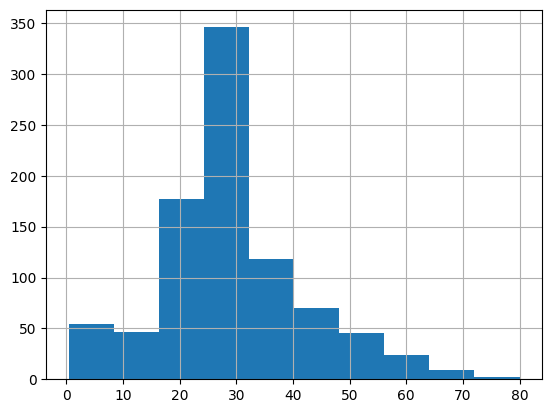

In [99]:
ax = titanic2['age'].hist(bins=10)

In [107]:
titanic2['age2'] = 0
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       891 non-null    float64 
 1   class     891 non-null    category
 2   fare      891 non-null    float64 
 3   parch     891 non-null    int64   
 4   pclass    891 non-null    int64   
 5   sex       891 non-null    int64   
 6   sibsp     891 non-null    int64   
 7   survived  891 non-null    int64   
 8   age2      891 non-null    int64   
dtypes: category(1), float64(2), int64(6)
memory usage: 56.8 KB


In [111]:
titanic2['age2'] = titanic2['age'].apply(lambda x : int(x // 10))

In [112]:
titanic2['age2']

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: age2, Length: 891, dtype: int64

In [117]:
titanic2.drop(columns=['class'],inplace=True)

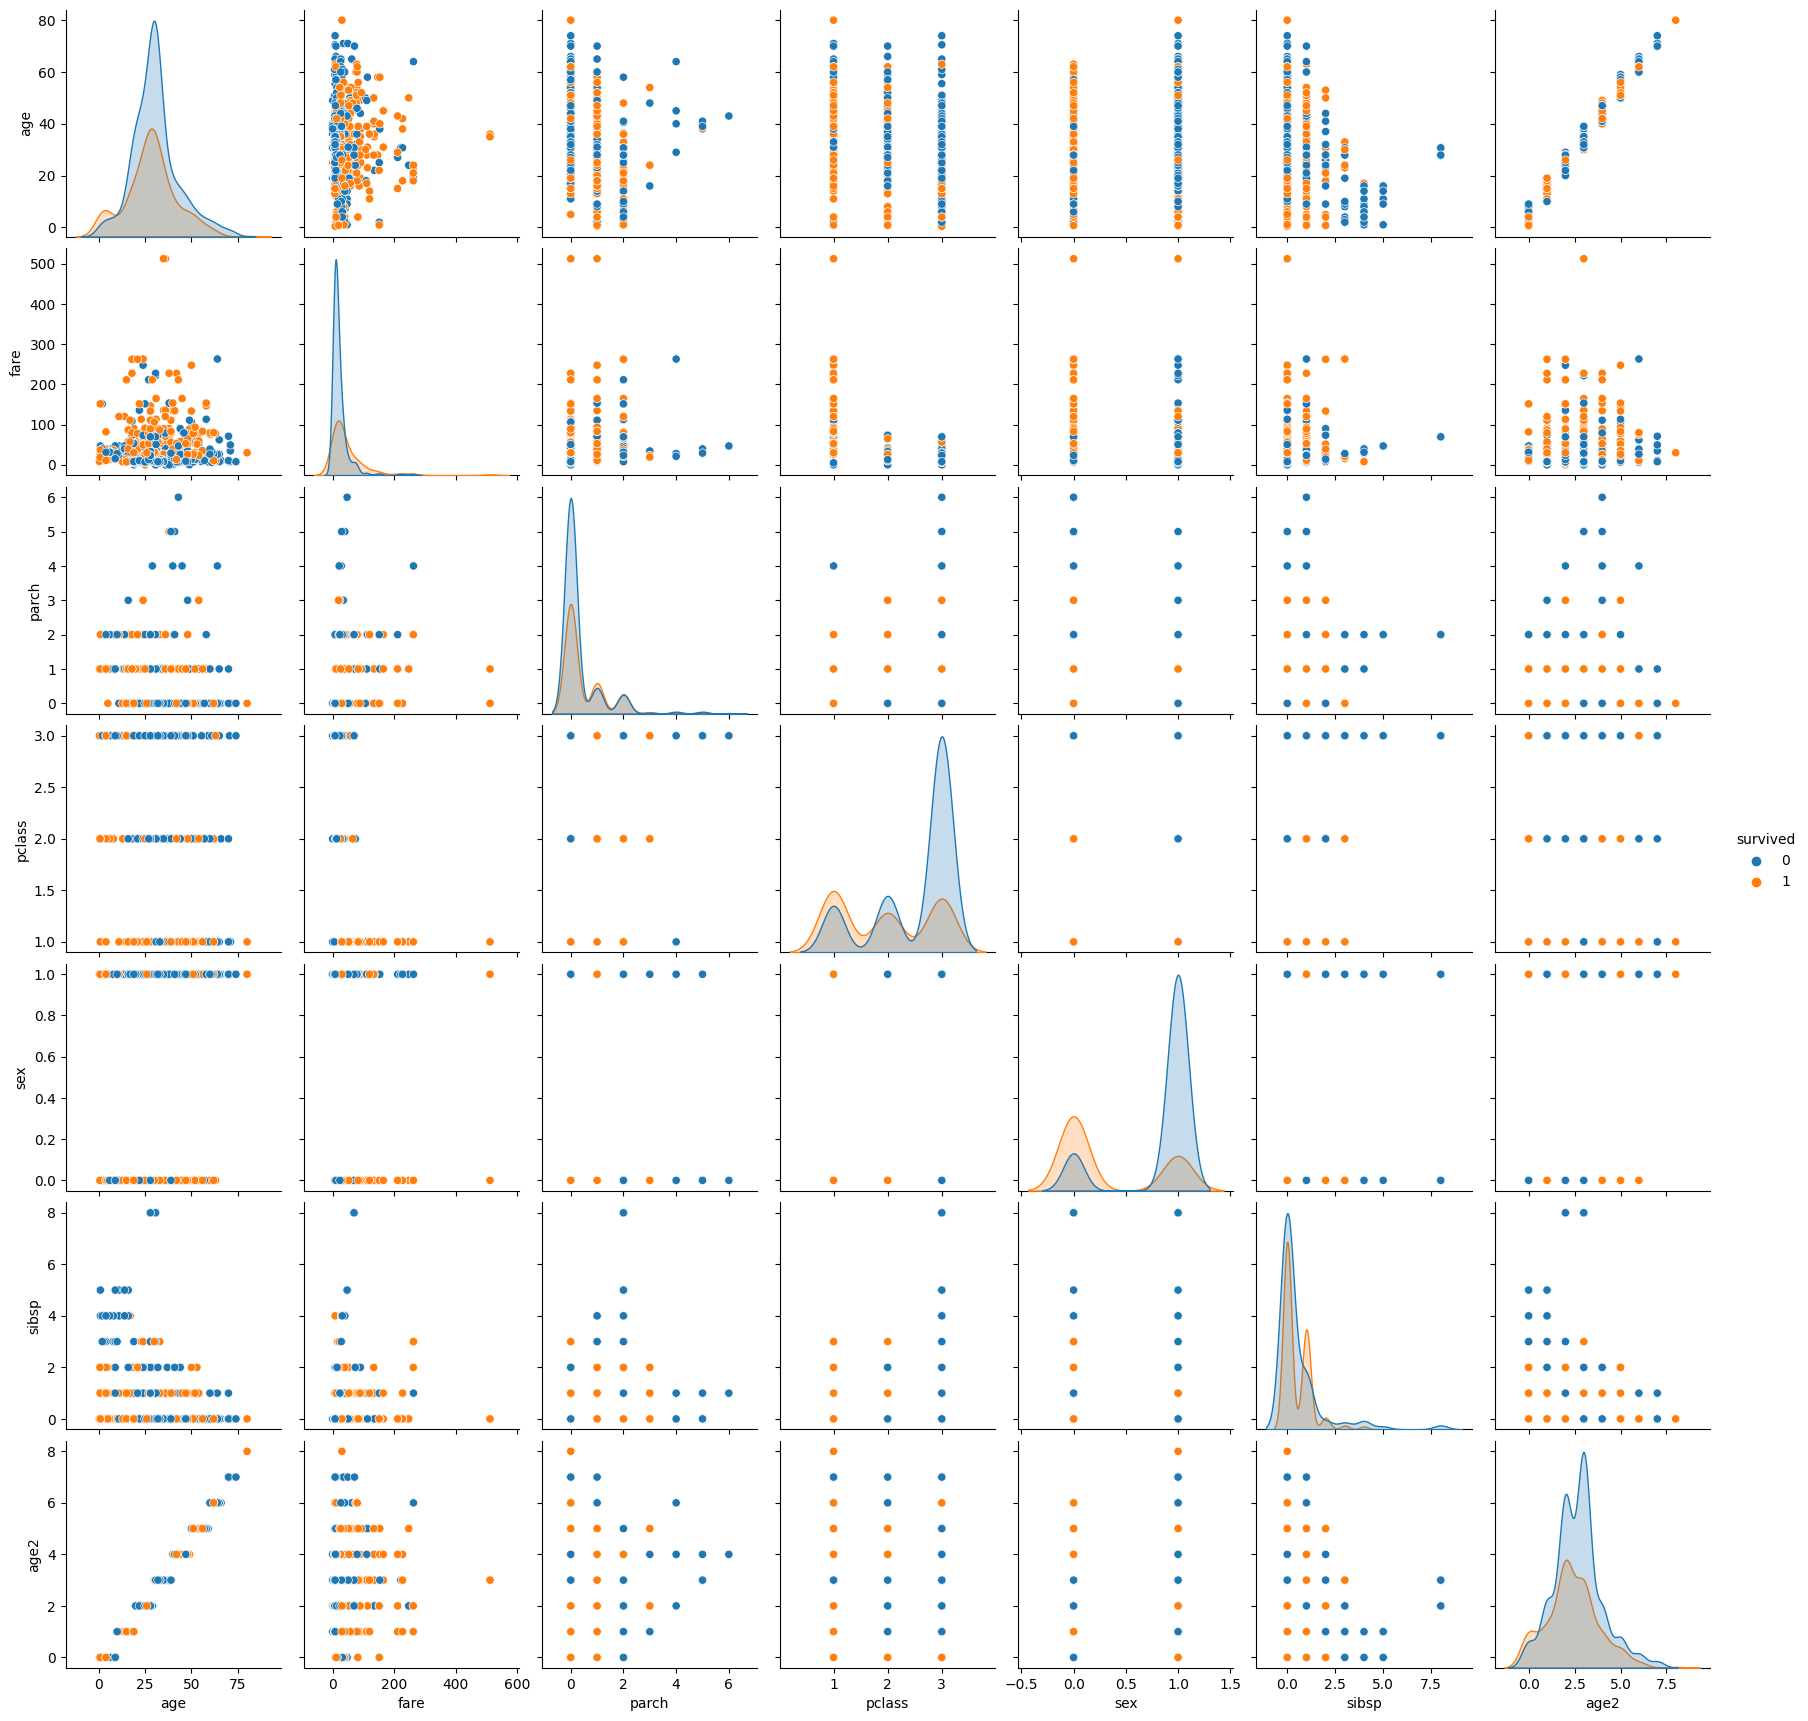

In [118]:
sns.pairplot(data=titanic2,hue='survived')

<AxesSubplot:>

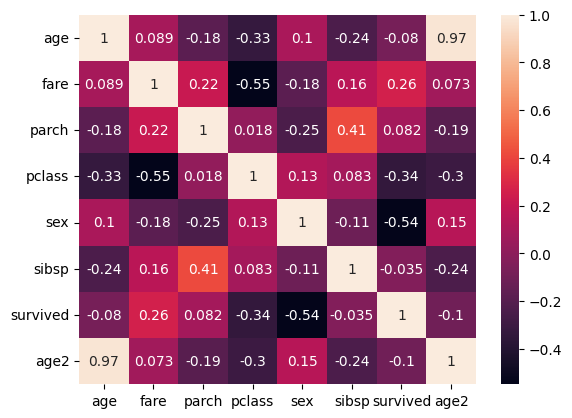

In [123]:
titanic2.corr()
sns.heatmap(data=titanic2.corr(),annot=True)

In [ ]:
# 모델을 만들때.. 어떤 피처를 쓸까?
# 1. 다쓴다.
# 2. 골라쓴다.
# 3. 기존 피처를 이용해서 의미있는 새로운 피처를 생성해서쓴다.